# Классификация клиентов телеком компаний

## Постановка задачи 
В данном проекте будут предоставлены данные от мобильного оператора "Мегалайн". \
Оператор мобильной связи выяснил, что многие клиенты пользуются архивными тарифами. Им необходимо построить систему, способную проанализировать поведение клиентов и предложить им перейти на тарифы "Смарт" и "Ультра". \
Для решения данной задачи необходимо проанализировать исходные данные и построить модель для задачи классификации, которая выберет подходящий тариф.

Также необходимо построить модель с максимально большим значением accuracy (более 0.75).

## Загрузка датасета и знакомство с данными

In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.dummy import DummyClassifier

In [93]:
try:
    df = pd.read_csv('C:/Users/trombee/YandexDisk/Учеба/Я. Практикум/Проект. Введение в машинное обучение/users_behavior.csv')
except:
    df = pd.read_csv('/datasets/users_behavior.csv')
df

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0
...,...,...,...,...,...
3209,122.0,910.98,20.0,35124.90,1
3210,25.0,190.36,0.0,3275.61,0
3211,97.0,634.44,70.0,13974.06,0
3212,64.0,462.32,90.0,31239.78,0


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


In [95]:
df.describe()

,calls,minutes,messages,mb_used,is_ultra
count,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000
mean,63.038892,438.208787,38.281269,17207.673836,0.306472
std,33.236368,234.569872,36.148326,7570.968246,0.461100
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,274.575000,9.000000,12491.902500,0.000000
50%,62.000000,430.600000,30.000000,16943.235000,0.000000
75%,82.000000,571.927500,57.000000,21424.700000,1.000000
max,244.000000,1632.060000,224.000000,49745.730000,1.000000


In [96]:
df['is_ultra'].mean()

0.30647168637212197

In [97]:
corr = df.corr()
corr

,calls,minutes,messages,mb_used,is_ultra
calls,1.000000,0.982083,0.177385,0.286442,0.207122
minutes,0.982083,1.000000,0.173110,0.280967,0.206955
messages,0.177385,0.173110,1.000000,0.195721,0.203830
mb_used,0.286442,0.280967,0.195721,1.000000,0.198568
is_ultra,0.207122,0.206955,0.203830,0.198568,1.000000


## Разделение данных на обучающую, валидационную и тестовую выборки

In [98]:
features = df.drop('is_ultra', axis=1)
target = df['is_ultra']

In [99]:
features_train, features_test, target_train, target_test = train_test_split(features, target, random_state=12345, test_size=0.3, stratify=target)
features_valid, features_test, target_valid, target_test = train_test_split(features_test, target_test, random_state=12345, test_size=0.5, stratify=target_test)

In [100]:
print(f'Общее количество строк: {len(df)}')
print(f'Обучающая выборка:{len(features_train)}')
print(f'Валидационная выборка:{len(features_valid)}, доля от общих данных: {(len(features_valid) / len(df))}')
print(f'Тестовая выборка:{len(features_test)}, доля от общих данных: {(len(features_test) / len(df))}')

Общее количество строк: 3214
Обучающая выборка:2249
Валидационная выборка:482, доля от общих данных: 0.14996888612321096
Тестовая выборка:483, доля от общих данных: 0.15028002489110143


## Исследование качества разных моделей, с разными гипермараметрами

Максимальная глубина лучшей модель = 5
Результат лучшей модели = 0.8070539419087137


Text(0.5, 0, 'Максимальная глубина')

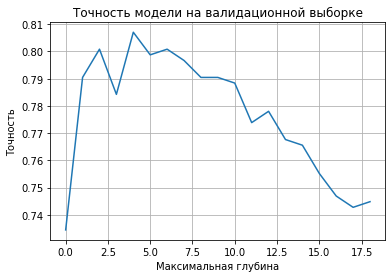

In [101]:
#Проверка модели дерева решений

best_model = None
best_result = 0
metrics = []

for i in range(1, 20):
    model = DecisionTreeClassifier(random_state=12345, max_depth=i)
    model.fit(features_train, target_train)
    predictions = model.predict(features_valid)
    result = accuracy_score(target_valid, predictions)
    metrics.append(result)
    if result > best_result:
        best_model = model
        best_result = result
print(f'Максимальная глубина лучшей модель = {best_model.max_depth}\nРезультат лучшей модели = {best_result}')

plt.plot(metrics)
plt.grid()
plt.title('Точность модели на валидационной выборке')
plt.ylabel('Точность')
plt.xlabel('Максимальная глубина')

In [102]:
#Проверка модели случайного леса

best_model = None
best_result = 0

for n_est in range(1, 11):
    for depth in range(1, 10):
        model = RandomForestClassifier(random_state=12345, n_estimators=n_est, max_depth=depth)
        model.fit(features_train, target_train)
        predictions = model.predict(features_valid)
        result = accuracy_score(target_valid, predictions)
        
        if best_result < result:
            best_result = result
            best_model = model
print(f'Количество деревьев лучшей модели = {best_model.n_estimators}\nГлубина лучшей модели = {best_model.max_depth}\nТочность лучшей модели = {best_result}')

Количество деревьев лучшей модели = 8
Глубина лучшей модели = 5
Точность лучшей модели = 0.8236514522821576


In [103]:
model = LogisticRegression(random_state=12345, solver='lbfgs', max_iter=1000)
model.fit(features_train, target_train)
predictions = model.predict(features_valid)
result = accuracy_score(target_valid, predictions)
print(f'Точность модели логистической регрессии = {result}')

Точность модели логистической регрессии = 0.7053941908713693


Промежуточные выводы: \
Модели дерева решений и случайного леса обе показывают неплохие результаты, и обе подходят для этих данных \
Но лучшей из них оказалась модель случайного леса с глубиной = 8, и количеством деревьев = 7 \
Модель логистической регрессии показала низкую точность, поэтому эта модель не подходит

## Проверка модели на тестовой выборке

In [109]:
# Лучшей моделью по точности стала модель случайного леса со следующими гиперпараметрами:
# n_estimators = 7
# max_depth = 8
# Проверим эту модель на тестовой выборке

model = RandomForestClassifier(random_state=12345, n_estimators=8, max_depth=5)
model.fit(features_train, target_train)
predictions = model.predict(features_test)
result = accuracy_score(target_test, predictions)
print(f'Точность модели на тестовой выборке = {result}')

Точность модели на тестовой выборке = 0.8136645962732919


Получился довольно хороший результат точности для этих данных - 81% точности.

In [110]:
new_features_train = pd.concat([features_train, features_valid])
new_target_train = pd.concat([target_train, target_valid])

In [113]:
model = RandomForestClassifier(random_state=12345, n_estimators=8, max_depth=5)
model.fit(new_features_train, new_target_train)
predictions = model.predict(features_test)
result = accuracy_score(target_test, predictions)
result

0.8157349896480331

## Проверка модели на вменяемость

In [11]:
model = DummyClassifier(random_state=12345, strategy='most_frequent')
model.fit(features, target)
model.score(features, target)

0.693528313627878

Не до конца понял это задание. Но в данном случае, такой результат означает, что полученная модель вменяемая, потому что результат точности лучшей модели - 81%, что больше 69. Если бы точность была бы ниже 69%, то модель уже была бы невменяемой.

<div style="border:solid orange 2px; padding: 20px"> 

## Вывод

Были предоставлены данные оператора мобильной связи "Мегалайн". Эти данные предварительно уже были обработаны. \

Для обучения моделей эти данные были разделены на выборке со своими пропорциями:
 - обучающая выборка - 70%
 - валидационная выборка ~20%
 - тестовая выборка ~10%
 
Далее были проверены различные вариации моделей, с различными гиперпараметрами. \
Были рассмотрены такие модели, как:
 - Дерево решений
 - Случайный лес
 - Логистическая регрессия

По результатам анализа, была выявлена наилучшая модель, которая показала наивысшую точность среди остальных. Это модель случайного леса со слудующими гиперпараметрами:
 - n_estimators = 7
 - max_depth = 8
 
При проверке этой модели на тестовой выборке, был показан результат равный 81.4% точности.

Также модель была проверена на вменяемость. Модель оказалась вменяемой, так как точность модели выше 69%.